In [28]:
import sys  
sys.path.insert(0, '../code')

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import experiment_manager as xpm
import pandas as pd

In [96]:
list_of_experiments = xpm.get_list_of_experiments("/home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_big",
                                                 only_finished=True)

Loaded  64  Results from  /home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_big

Hyperparameters: 
 {'dataset': ['EMNIST'], 'net': ['ConvNet'], 'n_clients': [100], 'dirichlet_alpha': [0.1, 100.0], 'x_transform': [None, 'rotation'], 'y_transform': [None, 'shift'], 'communication_rounds': [1000], 'local_epochs': [1], 'participation_rate': [0.1], 'batch_size': [128], 'layers': ['conv', 'weight', 'bias', 'fc', 'all|.', 'conv|fc1', '^((?!fc3\\.bias).)*$', 'none'], 'pretrained': [None], 'save_model': [None], 'log_frequency': [-100], 'log_path': ['layers_compare_big/'], 'job_id': [[49035], [49037]], 'finished': [True], 'log_id': [98133, 74725, 83586, 61220, 99693, 28834, 88688, 56057, 72332, 90646, 83146, 67046, 10571, 36592, 95792, 81219, 38049, 98387, 33595, 38114, 1115, 67260, 35675, 33361, 87674, 72406, 40703, 47340, 75951, 2451, 77175, 68676, 6145, 62148, 4800, 43052, 69814, 99982, 44372, 14050, 50503, 43521, 98052, 48550, 20678, 22584, 7382, 64990, 82471, 30267, 62262, 4

In [139]:
results = np.zeros([9, 8])
layers = ['bias', 'conv', 'fc', 'all|.', 'conv|fc1', '^((?!fc3\\.bias).)*$', 'weight', 'none',
         "^((?!loc).)*$"]

for xp in list_of_experiments+routing:
    r = xp.results
    hp = xp.hyperparameters    
    
    row = np.argwhere(np.array(layers)==hp["layers"]).flatten()
    
    i = {None : 0, 'rotation' : 1}[hp["x_transform"]]
    j = {None : 0, 'shift' : 1}[hp["y_transform"]]
    k = {100.0 : 0, 0.1 : 1}[hp["dirichlet_alpha"]]
    if "mean_accuracy" in r:
        mean = r["mean_accuracy"]
    else:
        mean = np.mean(r["client_accuracies"], axis=1)    
    results[row, 4*i+2*j+k] = mean[-1]

In [140]:
columns = ["{} {} {}".format(x_t, y_t, a) 
            for x_t in ["", "rot"] for y_t in ["", "shift"] for a in ["iid", "non-iid"] ]

In [141]:
frame = pd.DataFrame(results, index=layers, columns=columns)

In [142]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
frame.style.apply(highlight_max)

,iid,non-iid,shift iid,shift non-iid,rot iid,rot non-iid,rot shift iid,rot shift non-iid
bias,0.503419,0.788741,0.505469,0.804234,0.497487,0.783798,0.497021,0.786350
conv,0.510981,0.801792,0.506561,0.799769,0.510453,0.805695,0.511818,0.807683
fc,0.643635,0.744329,0.308407,0.657764,0.496981,0.674356,0.272832,0.656593
all|.,0.809618,0.715953,0.017920,0.046763,0.520468,0.372686,0.025373,0.066332
conv|fc1,0.508010,0.803649,0.515592,0.812887,0.475586,0.782315,0.466417,0.787669
^((?!fc3\.bias).)*$,0.808995,0.735379,0.027175,0.078497,0.531005,0.433789,0.037484,0.098032
weight,0.498762,0.796967,0.499125,0.782332,0.489457,0.797696,0.491752,0.803381
none,0.502628,0.791873,0.503652,0.791320,0.496529,0.782077,0.494302,0.792375
^((?!loc).)*$,0.666043,0.873979,0.490320,0.779910,0.523780,0.788974,0.480113,0.778561


In [143]:
sizes =  {"conv1.weight":150,"conv1.bias":6,"conv2.weight":2400,"conv2.bias":16,
 "fc1.weight":120*256,"fc1.bias":120,"fc2.weight":84*120,"fc2.bias":84,
 "fc3.weight":62*84,"fc3.bias":62}


In [148]:
[np.sum([v for k, v in sizes.items() if re.match(l, k)]) for l in layers]

[0.0, 2572, 46274, 48846, 33412, 48784, 0.0, 0.0, 48846]

In [163]:
bool(re.match(".*bias.*", "aconv1.bias"))

True

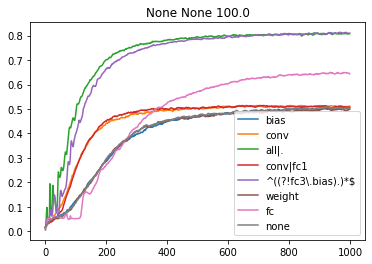

No handles with labels found to put in legend.


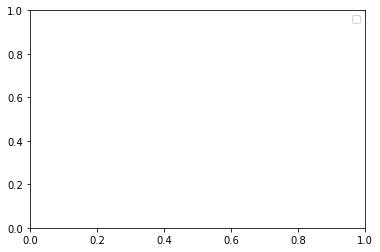

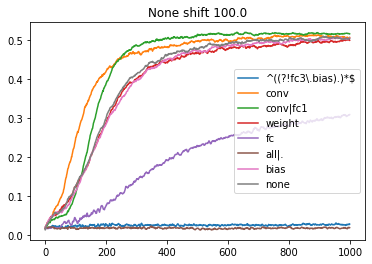

No handles with labels found to put in legend.


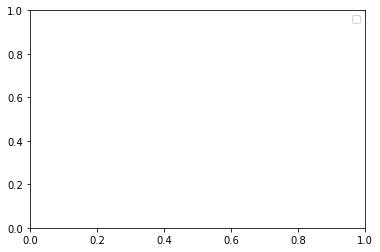

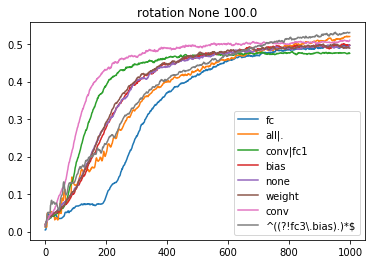

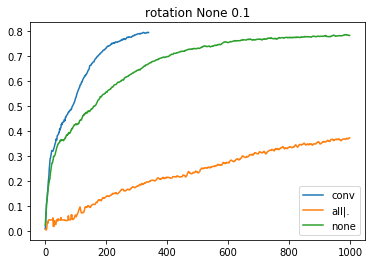

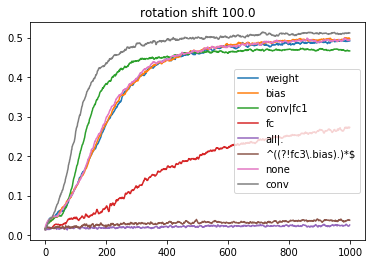

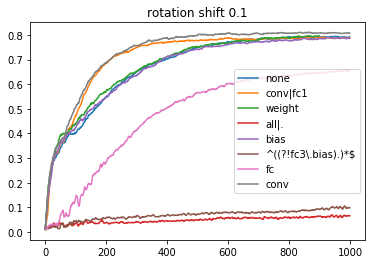

In [56]:
for x_t in [None, 'rotation']:
    for y_t in [None, 'shift']:
        for alpha in [100.0, 0.1]:

            xps = filter(lambda x : x.hyperparameters["x_transform"]==x_t and
                                    x.hyperparameters["y_transform"]==y_t and
                                     x.hyperparameters["dirichlet_alpha"] == alpha,
                        list_of_experiments)
            for xp in xps:
                r = xp.results
                hp = xp.hyperparameters

                if "mean_accuracy" in r:
                    mean = r["mean_accuracy"]
                else:
                    mean = np.mean(r["client_accuracies"], axis=1)

                plt.plot(mean, label=hp["layers"])
                plt.title("{} {} {}".format(x_t, y_t, alpha))

            plt.legend()
            plt.show()

In [104]:
routing = xpm.get_list_of_experiments("/home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_routing",
                                                 only_finished=True)

Loaded  8  Results from  /home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_routing

Hyperparameters: 
 {'dataset': ['EMNIST'], 'net': ['RoutingNet'], 'n_clients': [100], 'dirichlet_alpha': [0.1, 100.0], 'x_transform': [None, 'rotation'], 'y_transform': ['shift', None], 'communication_rounds': [1000], 'local_epochs': [1], 'participation_rate': [0.1], 'batch_size': [128], 'layers': ['^((?!loc).)*$'], 'pretrained': [None], 'save_model': [None], 'log_frequency': [-100], 'log_path': ['layers_compare_routing/'], 'job_id': [[]], 'finished': [True], 'log_id': [75019, 44619, 29917, 64661, 51737, 81046, 98907, 14320]}

Tracked Variables: 
 ['client_accuracies', 'mean_accuracy', 'communication_round', 'epochs']


In [114]:

for xp in routing:
    r = xp.results
    
    
    print(np.mean(r["client_accuracies"], axis=1)[-1])

0.7799102086891285
0.7889744681993334
0.8739790583901156
0.490319962317983
0.7785613520011804
0.6660433970156286
0.48011311124675715
0.5237804543191819
